In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 5.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=26023a1a144662fc22b1076d5bf4449e934ccd6c0b74b316992690b3c662578f
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


# Linear SVC

[LinearSVC()](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)
```
LinearSVC(penalty, loss, dual, tol, C, multi_class, fit_intercept, intercept_scaling, class_weight, verbose, random_state, max_iter)
```
- <font color=yellow> penalty : 규제에 사용 된 기준을 지정 (l1, l2) – default : l2 </font>
- loss : 손실함수
- dual : 이중 또는 초기 공식
- tol : 정밀도
- <font color=yellow> C : 규제 강도 </font> 
- multi_class : 다중 분류 시에 (ovr, multinomial, auto)로 설정
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- intercept_scaling : 정규화 효과 정도
- class_weight : 클래스의 가중치
- verbose : 동작 과정에 대한 출력 메시지
- random_state : 난수 seed 설정
- max_iter : 계산에 사용할 작업 수

In [19]:
from mglearn.datasets import make_forge
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.svm import LinearSVC

In [20]:
  # 데이터 로드
  x,y = make_forge()
  x,y

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


(array([[ 9.96346605,  4.59676542],
        [11.0329545 , -0.16816717],
        [11.54155807,  5.21116083],
        [ 8.69289001,  1.54322016],
        [ 8.1062269 ,  4.28695977],
        [ 8.30988863,  4.80623966],
        [11.93027136,  4.64866327],
        [ 9.67284681, -0.20283165],
        [ 8.34810316,  5.13415623],
        [ 8.67494727,  4.47573059],
        [ 9.17748385,  5.09283177],
        [10.24028948,  2.45544401],
        [ 8.68937095,  1.48709629],
        [ 8.92229526, -0.63993225],
        [ 9.49123469,  4.33224792],
        [ 9.25694192,  5.13284858],
        [ 7.99815287,  4.8525051 ],
        [ 8.18378052,  1.29564214],
        [ 8.7337095 ,  2.49162431],
        [ 9.32298256,  5.09840649],
        [10.06393839,  0.99078055],
        [ 9.50048972, -0.26430318],
        [ 8.34468785,  1.63824349],
        [ 9.50169345,  1.93824624],
        [ 9.15072323,  5.49832246],
        [11.563957  ,  1.3389402 ]]),
 array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 

In [21]:
# 모델 학습
model = LinearSVC(C = 1).fit(x,y)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


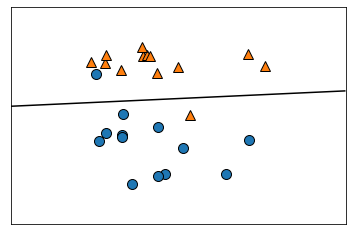

In [22]:
# 결정경계 시각화
mglearn.plots.plot_2d_separator(model,x) #C 값이 줄어들면 경계 값이 바뀌면서 아래로 내려가는 현상이 보인다. = 과소적합  C 값이 커지면 과대 적합이 발생 한다.
mglearn.discrete_scatter(x[:,0],x[:,1],y)
plt.show()

### C 값의 변화에 따른 결정경계의 변화


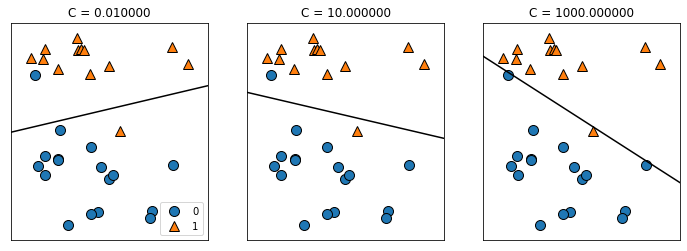

In [6]:
# linear SVC 결정경계 변화
mglearn.plots.plot_linear_svc_regularization() #기울기가 이상치 데이터에 맞물린다 = 경사각이 급해진다.

- 왼쪽 그림은 아주 작은 C 값 때문에 클래스 0은 아래쪽에 1은 위쪽에 대부분 배치, 2개가 잘못 분류 (결정경계가 수평에 가까움)
- C 값이 올라가면 결정경계가 기울어지며 최종적으로 클래스 0은 모두 아래쪽에 위치됨 -> 과대 적합

#### Linear SVC 실습 01

와인 데이터 분류

In [7]:
from sklearn.datasets import load_wine

# 데이터 로드
wine = load_wine()
C = [100,10,1,0.1,0.01]
x = wine.data
y = wine.target
x.shape , y.shape

((178, 13), (178,))

In [8]:
# 훈련셋 및 테스트셋 분리
from sklearn.model_selection import train_test_split
train_x,test_x ,train_y,test_y = train_test_split(x,y,random_state = 32)


In [9]:
# 모델학습
from sklearn.svm import LinearSVC
for c in C:
  print(c)
  model = LinearSVC(C = c,penalty='l2').fit(train_x,train_y)
  print(model.score(train_x,train_y) , model.score(test_x,test_y))


100
0.9548872180451128 0.8888888888888888
10
0.9473684210526315 0.9333333333333333
1
0.8947368421052632 0.8666666666666667
0.1
0.9398496240601504 0.8888888888888888
0.01
0.8571428571428571 0.9333333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

In [10]:
# 스코어 확인
model.score(train_x,train_y) , model.score(test_x,test_y)

(0.8571428571428571, 0.9333333333333333)

In [11]:
# 예측
predict_y = model.predict(test_x)
print(predict_y)
print(test_y)
print(np.equal(predict_y,test_y)) #5개 정도 틀림 

print(np.mean(np.equal(predict_y,test_y)))

[1 1 0 2 2 0 0 2 0 0 1 2 0 0 0 2 0 1 0 0 1 2 2 0 1 2 0 0 0 0 2 0 2 1 0 1 2
 0 2 2 0 1 2 2 0]
[1 1 0 2 2 0 0 2 0 0 1 2 0 0 0 2 1 1 0 0 1 2 2 2 1 2 0 0 0 0 1 0 2 1 0 1 2
 0 2 2 0 1 2 2 0]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True False
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]
0.9333333333333333


#### Linear SVC 실습 02

붓꽃 데이터 분류

In [28]:
# 데이터 로드
from sklearn.datasets import load_iris
iris = load_iris()

x = iris.data
y = iris.target

C = [100,10,1,0.1,0.01]

In [30]:
# 훈련셋 및 테스트셋 분리
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 0)

In [35]:
# 모델학습
from sklearn.svm import LinearSVC

for c in C:
  model = LinearSVC(C = c,max_iter = 10000).fit(train_x,train_y)
# 스코어 확인
  print(model.score(train_x,train_y) , model.score(test_x,test_y))


0.9910714285714286 0.9736842105263158
0.9910714285714286 0.9473684210526315
0.9821428571428571 0.9210526315789473
0.9464285714285714 0.868421052631579
0.6964285714285714 0.5789473684210527


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [27]:
# 스코어 확인
model.score(train_x,train_y) , model.score(test_x,test_y)

(0.9732142857142857, 1.0)

In [34]:
# 예측
pred_y = model.predict(test_x)
pred_y



0.5789473684210527

## Linear SVC와 Logistic Regression의 장단점

- 선형 모델의 주요 매개변수는 회귀 모델에서는 alpha였고 LinearSVC와 LogisticRegression에서는 C 
- alpha 값이 클수록, C 값이 작을수록 모델이 단순해짐 (반비례 관계)
- 회귀 모델에서 이 매개변수를 조정하는 일이 매우 중요 (정확도 가 확 달라진다)

- L1 규제를 사용할지 L2 규제를 사용할지를 정해야 함
- 중요한 특성이 많지 않다고 생각하면 L1 규제를 사용하고 그렇지 않으면 기본적으로 L2 규제를 사용 L1 = Lasso L2 는 Ridge

- 선형 모델은 학습 속도가 빠르고 예측도 빠름
- 매우 큰 데이터셋과 희소한 데이터셋에도 잘 작동
- 수십만에서 수백만 개의 샘플로 이뤄진 대용량 데이터셋이라면 기본 설정보다 빨리 처리하도록 LogisticRegression과 Ridge에 solver=’sag’ 옵션을 줌 (확률적 경사 하강법)  + L2 규제만 쓸수 있음 

- 선형 모델은 샘플에 비해 특성이 많을 때 잘 작동
- 다른 모델로 학습하기 어려운 매우 큰 데이터셋에도 선형 모델을 많이 사용